<a href="https://colab.research.google.com/github/EduardoAlfaroCh/Challenge-Store-Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
# Calcular el ingreso total de cada tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

print(f"Ingreso total tienda 1: {ingreso_tienda1}")
print(f"Ingreso total tienda 2: {ingreso_tienda2}")
print(f"Ingreso total tienda 3: {ingreso_tienda3}")
print(f"Ingreso total tienda 4: {ingreso_tienda4}")


Ingreso total tienda 1: 1150880400.0
Ingreso total tienda 2: 1116343500.0
Ingreso total tienda 3: 1098019600.0
Ingreso total tienda 4: 1038375700.0


# 2. Ventas por categoría

In [11]:
# Agrupar por categoría y contar las ventas en cada tienda
ventas_categoria_tienda1 = tienda.groupby('Categoría del Producto')['Producto'].count()
ventas_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Producto'].count()
ventas_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Producto'].count()
ventas_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Producto'].count()

# Mostrar las categorías más populares de cada tienda
print("Tienda 1:")
print(ventas_categoria_tienda1.sort_values(ascending=False))
print("\nTienda 2:")
print(ventas_categoria_tienda2.sort_values(ascending=False))
print("\nTienda 3:")
print(ventas_categoria_tienda3.sort_values(ascending=False))
print("\nTienda 4:")
print(ventas_categoria_tienda4.sort_values(ascending=False))

Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Producto, dtype: int64

Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Producto, dtype: int64

Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
Name: Producto, dtype: int64

Tienda 4:
Categoría del Producto
Muebles                    480
Ele

# 3. Calificación promedio de la tienda


In [13]:
# Calcular la calificación promedio de cada tienda
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

print(f"Calificación promedio tienda 1: {calificacion_promedio_tienda1}")
print(f"Calificación promedio tienda 2: {calificacion_promedio_tienda2}")
print(f"Calificación promedio tienda 3: {calificacion_promedio_tienda3}")
print(f"Calificación promedio tienda 4: {calificacion_promedio_tienda4}")

Calificación promedio tienda 1: 3.976685036032217
Calificación promedio tienda 2: 4.037303942348453
Calificación promedio tienda 3: 4.048325561678677
Calificación promedio tienda 4: 3.9957591178965224


# 4. Productos más y menos vendidos

In [19]:
# Productos más vendidos y menos vendidos

def analizar_ventas(tienda, nombre_tienda):
    ventas_producto = tienda.groupby('Producto')['Producto'].count() # Agrupo y cuento por producto por que es el mismo nombre y eso no cambiara, como si podria por ejemplo si cuento por precio que podria variar por descuentos o algo parecido.
    producto_mas_vendido = ventas_producto.idxmax()
    producto_menos_vendido = ventas_producto.idxmin()

    print(f"\n{nombre_tienda}:")
    print(f"Producto más vendido: {producto_mas_vendido} (Ventas: {ventas_producto.max()})")
    print(f"Producto menos vendido: {producto_menos_vendido} (Ventas: {ventas_producto.min()})")

analizar_ventas(tienda, "Tienda 1")
analizar_ventas(tienda2, "Tienda 2")
analizar_ventas(tienda3, "Tienda 3")
analizar_ventas(tienda4, "Tienda 4")


Tienda 1:
Producto más vendido: Armario (Ventas: 60)
Producto menos vendido: Auriculares con micrófono (Ventas: 33)

Tienda 2:
Producto más vendido: Iniciando en programación (Ventas: 65)
Producto menos vendido: Juego de mesa (Ventas: 32)

Tienda 3:
Producto más vendido: Kit de bancas (Ventas: 57)
Producto menos vendido: Bloques de construcción (Ventas: 35)

Tienda 4:
Producto más vendido: Cama box (Ventas: 62)
Producto menos vendido: Guitarra eléctrica (Ventas: 33)


# 5. Envío promedio por tienda

In [20]:
# Calcular el costo de envío promedio para cada tienda
costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

print(f"Costo de envío promedio tienda 1: {costo_envio_promedio_tienda1}")
print(f"Costo de envío promedio tienda 2: {costo_envio_promedio_tienda2}")
print(f"Costo de envío promedio tienda 3: {costo_envio_promedio_tienda3}")
print(f"Costo de envío promedio tienda 4: {costo_envio_promedio_tienda4}")

Costo de envío promedio tienda 1: 26018.60958033065
Costo de envío promedio tienda 2: 25216.235693090293
Costo de envío promedio tienda 3: 24805.680373039424
Costo de envío promedio tienda 4: 23459.457167090754


# 6. Gráficos

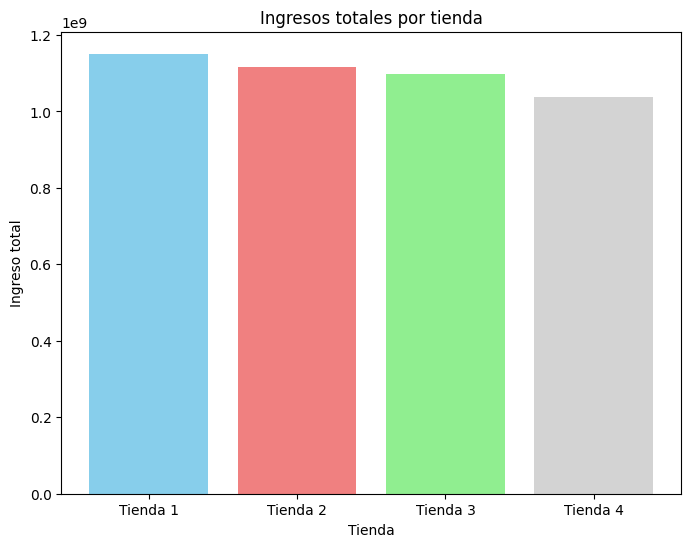

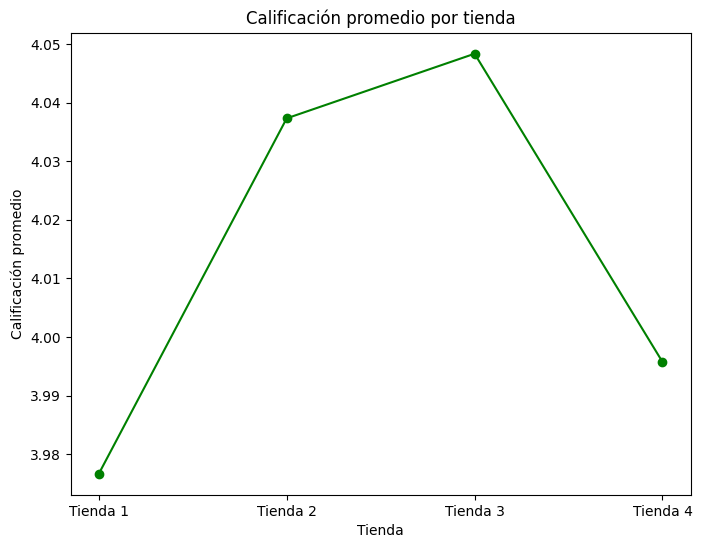

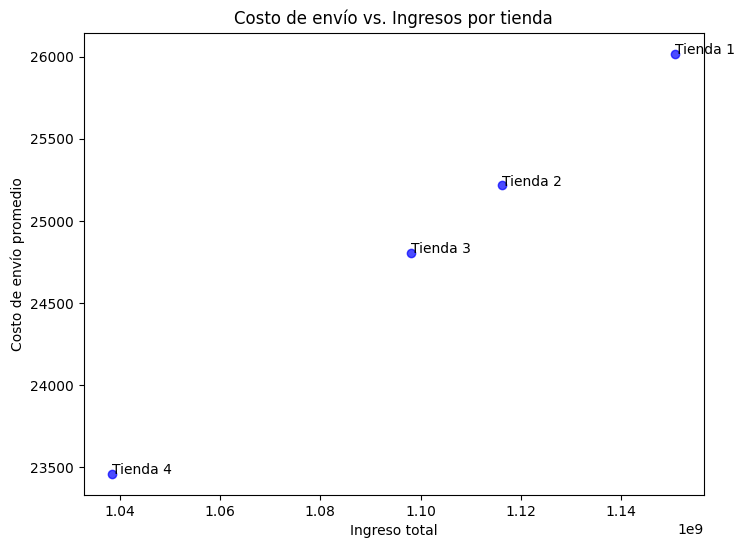

In [37]:
import matplotlib.pyplot as plt

# Datos para los gráficos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
calificaciones = [calificacion_promedio_tienda1, calificacion_promedio_tienda2, calificacion_promedio_tienda3, calificacion_promedio_tienda4]
costos_envio = [costo_envio_promedio_tienda1, costo_envio_promedio_tienda2, costo_envio_promedio_tienda3, costo_envio_promedio_tienda4]

# Gráfico de barras: Ingresos por tienda
plt.figure(figsize=(8, 6))
plt.bar(tiendas, ingresos, color=['skyblue', 'lightcoral', 'lightgreen', 'lightgray'])
plt.title('Ingresos totales por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso total')
plt.show()


# Gráfico de líneas: Calificaciones promedio
plt.figure(figsize=(8, 6))
plt.plot(tiendas, calificaciones, marker='o', linestyle='-', color='Green')
plt.title('Calificación promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')
plt.show()


# Gráfico de dispersión: Costo de envío vs. Ingresos
plt.figure(figsize=(8, 6))
plt.scatter(ingresos, costos_envio, color='Blue', alpha=0.7)
plt.title('Costo de envío vs. Ingresos por tienda')
plt.xlabel('Ingreso total')
plt.ylabel('Costo de envío promedio')
for i, txt in enumerate(tiendas):
    plt.annotate(txt, (ingresos[i], costos_envio[i]))
plt.show()

# 7. Informe Final

In [31]:
def imprimir_informe():
    print("Informe Final: Selección de Tienda para el Sr. Juan \n")

    # Introducción
    print("El objetivo de este análisis es determinar cuál de las cuatro tiendas es la más adecuada para que el Sr. Juan venda sus productos,")
    print("tomando en cuenta cinco factores principales: ingresos totales, categorías de productos más y menos vendidas,")
    print("calificación promedio de clientes, productos más y menos vendidos, y costos de envío promedio.")
    print("Este informe sintetiza los hallazgos clave de cada tienda y justifica la recomendación final basada en")
    print("una evaluación objetiva de sus fortalezas y debilidades.\n")

    # Desarrollo
    print("1. Ingresos Totales")
    print("Los ingresos totales son un indicador importante del volumen de ventas y la capacidad de mercado de cada tienda:")
    print("- Tienda 1: 1,150,880,400.0")
    print("- Tienda 2: 1,116,343,500.0")
    print("- Tienda 3: 1,098,019,600.0")
    print("- Tienda 4: 1,038,375,700.0")
    print("\nLa Tienda 1 registra los ingresos más altos, lo que demuestra un mercado dinámico y posiblemente una mayor afluencia de clientes.\n")

    print("2. Categorías de Productos Más y Menos Vendidas")
    print("Es relevante identificar las categorías con mayor demanda y aquellas con menor movimiento:")
    print("- Tienda 1: Más vendidos: Muebles (465), Electrónicos (448); Menos vendidos: Artículos para el hogar (171), Libros (173).")
    print("- Tienda 2: Más vendidos: Muebles (442), Electrónicos (422); Menos vendidos: Libros (197), Artículos para el hogar (181).")
    print("- Tienda 3: Más vendidos: Muebles (499), Electrónicos (451); Menos vendidos: Instrumentos musicales (177), Artículos para el hogar (177).")
    print("- Tienda 4: Más vendidos: Muebles (480), Electrónicos (451); Menos vendidos: Instrumentos musicales (170), Guitarras eléctricas (170).")
    print("\nEn todas las tiendas, la categoría de muebles domina las ventas, mostrando una tendencia clara de los consumidores hacia esta clase de producto.")
    print("Los artículos menos vendidos varían ligeramente, pero tienden a ser más específicos o especializados.\n")

    print("3. Calificaciones Promedio de Clientes")
    print("La satisfacción del cliente es crucial para la reputación y la competitividad de cada tienda:")
    print("- Tienda 1: 3.98")
    print("- Tienda 2: 4.04")
    print("- Tienda 3: 4.05")
    print("- Tienda 4: 4.00")
    print("\nLa Tienda 3 tiene la calificación más alta, seguida de cerca por la Tienda 2. Esto sugiere una mejor experiencia para los clientes en ambas.\n")

    print("4. Productos Más y Menos Vendidos")
    print("Identificar los productos más y menos vendidos permite explorar oportunidades de mercado:")
    print("- Tienda 1: Más vendido: Armario (60); Menos vendido: Auriculares con micrófono (33).")
    print("- Tienda 2: Más vendido: Iniciando en programación (65); Menos vendido: Juego de mesa (32).")
    print("- Tienda 3: Más vendido: Kit de bancas (57); Menos vendido: Bloques de construcción (35).")
    print("- Tienda 4: Más vendido: Cama box (62); Menos vendido: Guitarra eléctrica (33).")
    print("\nLos productos más vendidos de cada tienda tienden a ser funcionales, mientras que los menos vendidos corresponden a nichos más específicos.\n")

    print("5. Costos de Envío Promedio")
    print("El costo de envío afecta la accesibilidad y rentabilidad de las operaciones para el Sr. Juan:")
    print("- Tienda 1: 26,018.61")
    print("- Tienda 2: 25,216.24")
    print("- Tienda 3: 24,805.68")
    print("- Tienda 4: 23,459.46")
    print("\nLa Tienda 4 ofrece el costo de envío promedio más bajo, lo que podría ser una ventaja económica significativa.\n")

    # Conclusión
    print("Recomendación \n")
    print("Tras considerar todos los factores analizados, la Tienda 3 destaca como la mejor opción para el Sr. Juan.")
    print("Aunque sus ingresos totales son ligeramente inferiores a los de la Tienda 1, cuenta con la calificación promedio más alta,")
    print("lo cual indica una mejor experiencia y satisfacción de los clientes.")
    print("\nLa Tienda 4, aunque presenta el menor costo de envío, tiene ingresos y calificaciones inferiores. Por otro lado, la Tienda 1")
    print("y la Tienda 2 son competitivas en ingresos, pero sus calificaciones y costos de envío no logran superar las fortalezas de la Tienda 3.")
    print("\nPor lo tanto, se recomienda que el Sr. Juan concentre sus esfuerzos en la Tienda 3 para maximizar sus oportunidades de venta en")
    print("un mercado con alta demanda y una sólida reputación entre los clientes.")

# Llamar a la función
imprimir_informe()

Informe Final: Selección de Tienda para el Sr. Juan 

El objetivo de este análisis es determinar cuál de las cuatro tiendas es la más adecuada para que el Sr. Juan venda sus productos,
tomando en cuenta cinco factores principales: ingresos totales, categorías de productos más y menos vendidas,
calificación promedio de clientes, productos más y menos vendidos, y costos de envío promedio.
Este informe sintetiza los hallazgos clave de cada tienda y justifica la recomendación final basada en
una evaluación objetiva de sus fortalezas y debilidades.

1. Ingresos Totales
Los ingresos totales son un indicador importante del volumen de ventas y la capacidad de mercado de cada tienda:
- Tienda 1: 1,150,880,400.0
- Tienda 2: 1,116,343,500.0
- Tienda 3: 1,098,019,600.0
- Tienda 4: 1,038,375,700.0

La Tienda 1 registra los ingresos más altos, lo que demuestra un mercado dinámico y posiblemente una mayor afluencia de clientes.

2. Categorías de Productos Más y Menos Vendidas
Es relevante identificar